## Classes
Everything is an object in Python including native types. You define class names with camel casing.
You define the constructor with special name `__init__()`. The fields (private) are denoted with `_variable_name` specification and properties are decorated with `@property` decorator.

Fields and properties are accessed within the class using `self.name` notation. This helps differentiate a class field / property from a local variable or method argument of the same name.

### A simple class
```python
class MyClass:
    _local_variables = "value"

    def __init__(self, args):  #constructor
        statements
        self._local_variables = args   # assign values to fields

    def func_1(self, args):
        statements
```
The first argument to class methods, including the constructor is `self`, which points to the instance itself. The name `self` is convention. You can call it anything. You can instantiate as shown below:

```python
obj1 = MyClass(args_defined_in_constructor)
```

In [6]:
# Define a class to hold a satellite or aerial imagery file. Its properties give information
# such as location of the ground, area, dimensions, spatial and spectral resolution etc.

class ImageryObject:
    _default_gsd = 5.0
    
    def __init__(self, file_path):
        self._file_path = file_path
        self._gps_location = (3,4)
        
    @property
    def bands(self):
        #count number of bands
        count = 3
        return count
    
    @property
    def gsd(self):
        # logic to calculate the ground sample distance
        gsd = 10.0
        return gsd
    
    @property
    def address(self):
        # logic to reverse geocode the self._gps_location to get address
        # reverse geocode self._gps_location
        address = "123 XYZ Street"
        return address
    
    #class methods
    def display(self):
        #logic to display picture
        print("image is displayed")
    
    def shuffle_bands(self):
        #logic to shift RGB combination
        print("shifting pands")
        self.display()

In [7]:
# class instantiation
img1 = ImageryObject("user\img\file.img") #pass value to constructor

In [8]:
img1.address

'123 XYZ Street'

In [9]:
img1._default_gsd

5.0

In [10]:
img1._gps_location

(3, 4)

In [11]:
img1.shuffle_bands()

shifting pands
image is displayed


In [12]:
# Get help on any object. Only public methods, properties are displayed.
# fields are private, properties are public. Class variables beginning with _ are private fields.
help(img1)

Help on ImageryObject in module __main__ object:

class ImageryObject(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, file_path)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  display(self)
 |      #class methods
 |  
 |  shuffle_bands(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  address
 |  
 |  bands
 |  
 |  gsd



## Overloading built-in methods
In Python, there is no concept of overloading. However, you can overwrite certain built-in methods to customize the behavior as shown below:

In [6]:
class Rectangle:
    "Defines a rectangle"
    
    def __init__(self, width, height):
        self._width = width
        self._height = height
        
    @property
    def width(self):
        return self._width
    
    @width.setter
    def width(self, w):
        if w < 0:
            raise ValueError("Width cannot be negative")
        else:
            self._width = w
    
    @property
    def height(self):
        return self._height
    
    @height.setter
    def height(self, h):
        if h < 0:
            raise valueError("Height cannot be negative")
        else:
            self._height = h
    
    def area(self):
        return self._width * self._height
    
    def perimeter(self):
        return 2*(self._width + self._height)
    
    # Customize how the object prints
    def __str__(self):
        return f"Rectangle: Width: {self._width}  Height: {self._height}"
    
    # Customize how the object displays in IPython kernels like notebooks
    def _repr_png_(self):
        import matplotlib.pyplot as plt
        from matplotlib.patches import Rectangle
        
        #define Matplotlib figure and axis
        fig, ax = plt.subplots()
        
        #create simple line plot
        ax.plot([0, 10],[0, 10])


        #add rectangle to plot
        ax.add_patch(Rectangle((1, 1), self._width, self._height))

        #display plot
        # plt.show()
        return ax
    
    # Equality checks. 
    # If you compare r1=Rectangle(10, 20) and r2 = Rectangle(10, 20), they would 
    # r1 is r2 => will return false as it should. These are 2 different objects
    # r1 == r2 => will also return False
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            if self.width == other.width and self.height == other.height:
                return True
            
        return False
    
    # LT, GT, LE, GE comparisons
    def __le__(self, other):
        if isinstance(other, self.__class__):
            if self.area() <= other.area():
                return True
        
        return False

Rectangle: Width: 10  Height: 20


/Users/Geodexter/opt/anaconda3/lib/python3.9/site-packages/IPython/core/formatters.py:368: FormatterWarning: image/png formatter returned invalid type <class 'matplotlib.axes._subplots.AxesSubplot'> (expected (<class 'bytes'>, <class 'str'>)) for object: <__main__.Rectangle object at 0x7f9ac63484f0>
  warnings.warn(


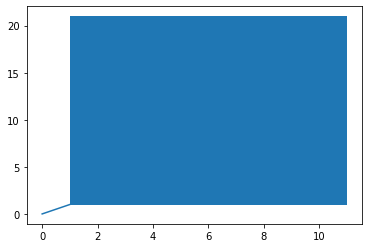

In [7]:
r1 = Rectangle(10, 20)
print(r1)
r1

In [8]:
r1.area(), r1.perimeter()

(200, 60)

In [9]:
r2 = Rectangle(10, 20) # same as r1
r1 is r2  # should be false as these are two diff obj, not singleton with alias

False

In [10]:
r1 == r2  # This should equate to True as these are the identical objects

True

In [11]:
r1 <= r2

True

In [12]:
r3 = Rectangle(30, 40)
print(r1 <= r3)
print(r3 <= r1)

True
False


In [15]:
r2 >= r3  # even though ge is not implemented, Python is smart and will flip le and use it.

False

In [16]:
# Will throw an error:
r2 > r3

TypeError: '>' not supported between instances of 'Rectangle' and 'Rectangle'

## Sidebar: Python Singletons

Singleton is a type of class which can instantiate just 1 instance of itself. Hence there can be just one object of that class and no more. These useful for making reference counters, manager objects.

In Python, `None`, `True`, `False` are all singleton objects. Now you can assign alias to them and call them something else, but all of those will still be alias pointing to the same single object in memory.

> Singletons are relevant for that session of the kernel. Once you restart, their address space will change.

In [11]:
print(None is None)
print(None == None)

lupus = None
print(lupus is None)  # Evals to True as None is a singleton and lupus is an alias
print(lupus == None)

True
True
True
True
